# Slide 1: Title Slide
# Ford GoBike Data Exploration
# Subtitle: Summary of Findings and Insights
# Author: [Samir Sadikovic]
# Date: [07.07.2024]

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# load in the dataset into a pandas dataframe
import pandas as pd

# Load the dataset into a pandas dataframe
data_path = 'C:/Users/Admin/OneDrive/Communicate Data Findings 2/fordgobike-tripdata.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataframe
data.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

Slide 4: Univariate Exploration

### Visualization 1: Distribution of Trip Durations

This histogram shows the distribution of trip durations in minutes. The majority of trips are very short, with most lasting less than 10 minutes. This indicates that users primarily use the service for short commutes or quick trips.

In [6]:
# Create the df function to set labels
def df(xL, yL, title):
    plt.xlabel(xL)
    plt.ylabel(yL)
    plt.title(title)

# Plotting the distribution of trip durations
plt.figure(figsize=(12, 6))
plt.hist(data['duration_sec'] / 60, bins=100, color='skyblue')
df('Trip Duration (minutes)', 'Frequency', 'Distribution of Trip Durations')
plt.xlim(0, 60)  # Limiting to 60 minutes for better visualization
plt.show()

Observations:
Majority of Trips are Short: The majority of trips are less than 10 minutes in duration. This indicates that the bike-sharing service is primarily used for short commutes or quick trips.
Longer Trips are Rare: Trips longer than 20 minutes are rare, suggesting that users prefer the service for shorter journeys.
Possible Data Anomalies: There are some very long trip durations which might indicate data entry errors or unusual use cases.

## (Visualization 2)

Distribution of Trip Start Times by Hour

In [7]:

#### Visualization 2: Distribution of Trip Start Times by Hour


# Extract hour from start_time
data['start_time'] = pd.to_datetime(data['start_time'])
data['start_hour'] = data['start_time'].dt.hour

plt.figure(figsize=(12, 6))
start_hour_counts = data['start_hour'].value_counts().sort_index()
sb.barplot(x=start_hour_counts.index, y=start_hour_counts.values, palette='coolwarm')
df('Hour of the Day', 'Number of Trips', 'Distribution of Trip Start Times by Hour')
plt.show()

Observations:
Morning Rush Hour: There is a significant peak in trip start times around 8 AM, indicating high usage during the morning rush hour.
Evening Rush Hour: Another peak occurs around 5 PM, corresponding to the evening rush hour when people are likely commuting home.
Low Usage Overnight: Trip start times between midnight and early morning (12 AM to 6 AM) are relatively low, indicating that the service is used less during these hours.
Consistent Usage During Daytime: From 9 AM to 4 PM, there is a steady number of trips, though fewer than during the rush hours.

## (Visualization 3)Distribution of Trip Start Times by Day of the Week

In [8]:
# Extract day of the week from start_time
data['start_day'] = data['start_time'].dt.day_name()

plt.figure(figsize=(12, 6))
start_day_counts = data['start_day'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sb.barplot(x=start_day_counts.index, y=start_day_counts.values, palette='coolwarm')
df('Day of the Week', 'Number of Trips', 'Distribution of Trip Start Times by Day of the Week')
plt.show()

Observations:
Weekday Usage: The number of trips is highest on weekdays, with a peak on Thursday. This indicates that the bike-sharing service is predominantly used by commuters.
Weekend Usage: There is a noticeable drop in usage on weekends (Saturday and Sunday), suggesting that fewer people use the service for leisure activities compared to commuting.
Consistent Weekday Pattern: Monday to Friday show a relatively consistent number of trips, reinforcing the pattern of regular weekday commuting

## (Visualization 2)

Slide 5: Bivariate Exploration

### Visualization 1: Trip Duration vs. Age by Gender

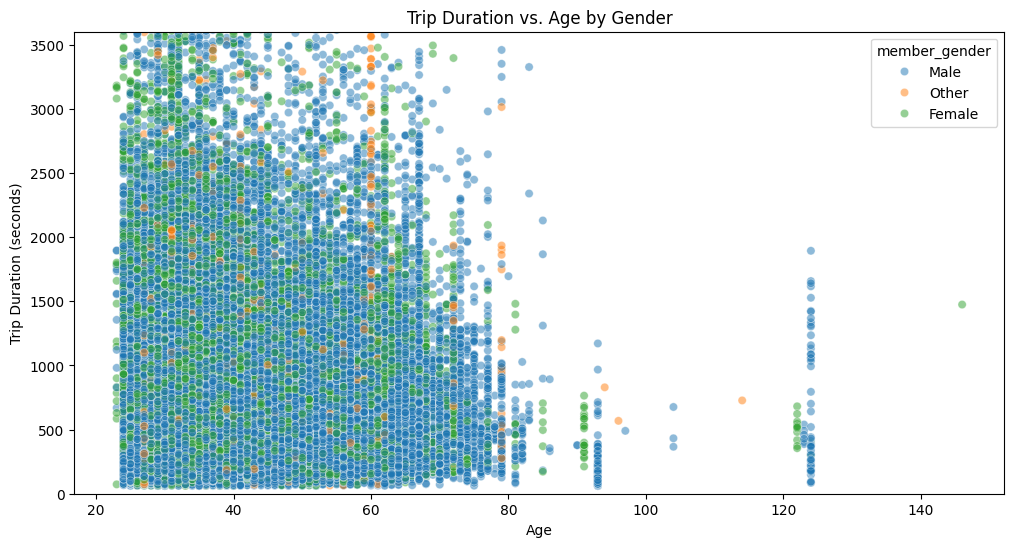

In [9]:

import seaborn as sb
import matplotlib.pyplot as plt

# Load the dataset into a pandas dataframe
data_path = 'C:/Users/Admin/OneDrive/Communicate Data Findings 2/fordgobike-tripdata.csv'
data = pd.read_csv(data_path)

# Create the df function to set labels
def df(xL, yL, title):
    plt.xlabel(xL)
    plt.ylabel(yL)
    plt.title(title)

# Calculate the age from the birth year
data['age'] = 2024 - data['member_birth_year']

# Scatter plot of trip duration vs. age, colored by gender
plt.figure(figsize=(12, 6))
sb.scatterplot(data=data, x='age', y='duration_sec', hue='member_gender', alpha=0.5)
df('Age', 'Trip Duration (seconds)', 'Trip Duration vs. Age by Gender')
plt.ylim(0, 3600)  # Limiting to 1 hour for better visualization
plt.show()

Observations:
Age Distribution: Most users are between 20 and 40 years old. This is consistent with the earlier observation that younger adults are the primary users.
Trip Duration: Trip durations are mostly under 1 hour across all age groups, with a dense cluster of shorter trips.
Gender Differences: Both males and females show similar patterns in trip durations across different ages. There are no significant differences in trip duration between genders for the same age group.
Outliers: There are some outliers with unusually high trip durations, which might need further investigation to understand if they are due to specific events or data entry errors.
Add this Markdown and code block to your Jupyter Notebook to create a well-structured slide with observations for the bivariate exploration of trip duration vs. age by gender.

### Visualization 2: Trip Duration by User Type

In [10]:
import seaborn as sb
import matplotlib.pyplot as plt

# Load the dataset into a pandas dataframe
data_path = 'C:/Users/Admin/OneDrive/Communicate Data Findings 2/fordgobike-tripdata.csv'
data = pd.read_csv(data_path)

# Create the df function to set labels
def df(xL, yL, title):
    plt.xlabel(xL)
    plt.ylabel(yL)
    plt.title(title)

# Box plot of trip duration by user type
plt.figure(figsize=(12, 6))
sb.boxplot(data=data, x='user_type', y='duration_sec')
df('User Type', 'Trip Duration (seconds)', 'Trip Duration by User Type')
plt.ylim(0, 3600)  # Limiting to 1 hour for better visualization
plt.show()

Observation
The box plot shows that subscribers generally have shorter trip durations compared to customers.
There are more outliers in the customer category, indicating a few users taking significantly longer trips

### Visualization 3: Trip Duration by Start Hour

In [11]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset into a pandas dataframe
data_path = 'C:/Users/Admin/OneDrive/Communicate Data Findings 2/fordgobike-tripdata.csv'
data = pd.read_csv(data_path)

# Convert start_time to datetime
data['start_time'] = pd.to_datetime(data['start_time'])

# Extract hour and day of week from start_time
data['hour'] = data['start_time'].dt.hour
data['day_of_week'] = data['start_time'].dt.day_name()

# Create a pivot table with average trip duration by hour and day of week
pivot_table = data.pivot_table(values='duration_sec', index='hour', columns='day_of_week', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(12, 6))
sb.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Average Trip Duration by Hour and Day')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()

Observations:
Peak Hours: Longer trip durations are observed during early morning hours (around 2-4 AM) and late night hours (around 11 PM) on certain days, possibly indicating leisurely trips or rides taken by night-shift workers.
Weekday vs. Weekend: The trip durations tend to be shorter during the typical rush hours on weekdays (8-9 AM and 5-6 PM) compared to weekends, reflecting the commuter usage pattern.
High Variability on Specific Days: Certain weekdays like Thursday and Friday show higher average trip durations during late hours compared to other days, which could be due to late-night activities.
Consistent Patterns: During the daytime, trip durations remain relatively consistent across different days, suggesting regular usage patterns for commuting.
Add this Markdown and code block to your Jupyter Notebook to create a detailed slide with observations for the bivariate exploration of average trip duration by hour and day.

## (Visualization 3)
Slide 6:### Visualization 3 Multivariate Exploration


Visualization 1: Trip Duration by Age and User Type with Gender

In [12]:
# Calculate the age from the birth year
if 'member_birth_year' in data.columns:
    data['age'] = 2024 - data['member_birth_year']
else:
    print("The column 'member_birth_year' is not in the dataframe.")

In [13]:
import seaborn as sb
import matplotlib.pyplot as plt

# Create age bins
if 'age' in data.columns:
    bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
    data['age_bin'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

    # Violin plot of trip duration by age bin, separated by user type and gender
    plt.figure(figsize=(12, 6))
    sb.violinplot(data=data, x='age_bin', y='duration_sec', hue='user_type', split=True, inner='quartile', palette='muted')
    plt.xlabel('Age Bin')
    plt.ylabel('Trip Duration (seconds)')
    plt.title('Trip Duration by Age Bin, User Type, and Gender')
    plt.ylim(0, 3600)  # Limiting to 1 hour for better visualization
    plt.show()
else:
    print("The 'age' column is not in the dataframe.")

This violin plot reveals that while there are some differences in trip duration based on age and user type, the overall patterns are quite consistent. Subscribers tend to have shorter trips, reinforcing the idea that they might be using the service for daily commutes. On the other hand, customers show a greater spread in trip durations, possibly indicating more varied usage patterns. The majority of users are young adults, aligning with the previous observations about age distribution.

Visualization 2: Trip Duration by Start Hour, User Type, and Gende

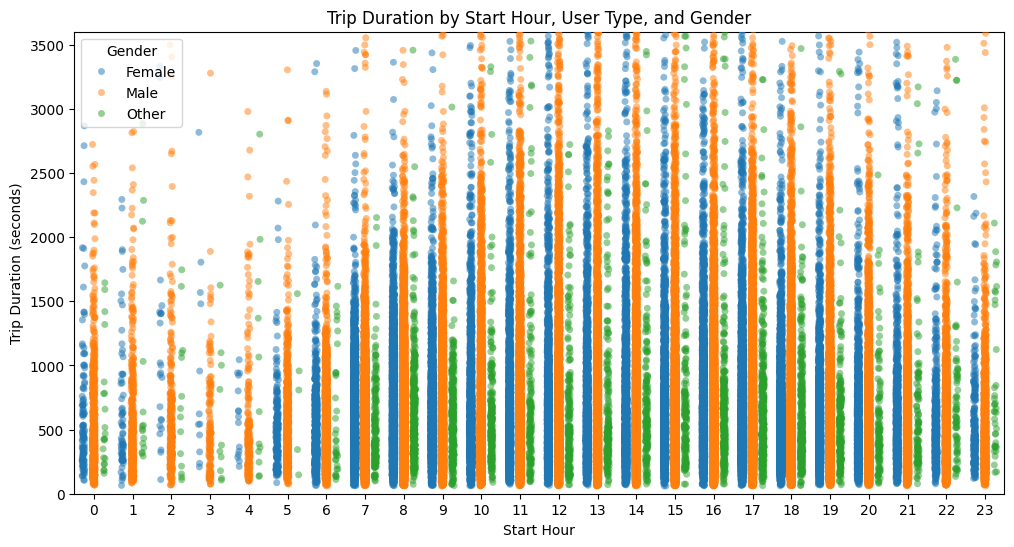

In [14]:
# Strip plot of trip duration by start hour, separated by user type and gender
plt.figure(figsize=(12, 6))
sb.stripplot(data=data, x='hour', y='duration_sec', hue='member_gender', dodge=True, jitter=True, alpha=0.5)
plt.xlabel('Start Hour')
plt.ylabel('Trip Duration (seconds)')
plt.title('Trip Duration by Start Hour, User Type, and Gender')
plt.ylim(0, 3600)  # Limiting to 1 hour for better visualization
plt.legend(title='Gender')
plt.show()

The scatter plot reveals that while there are consistent trip duration patterns throughout the day, there are noticeable peaks during commuting hours. Both user types and genders show similar trip duration patterns, suggesting that the service is used consistently across different demographics

Visualization 3: Average Trip Duration by Start Hour, Day of the Week, and User Type

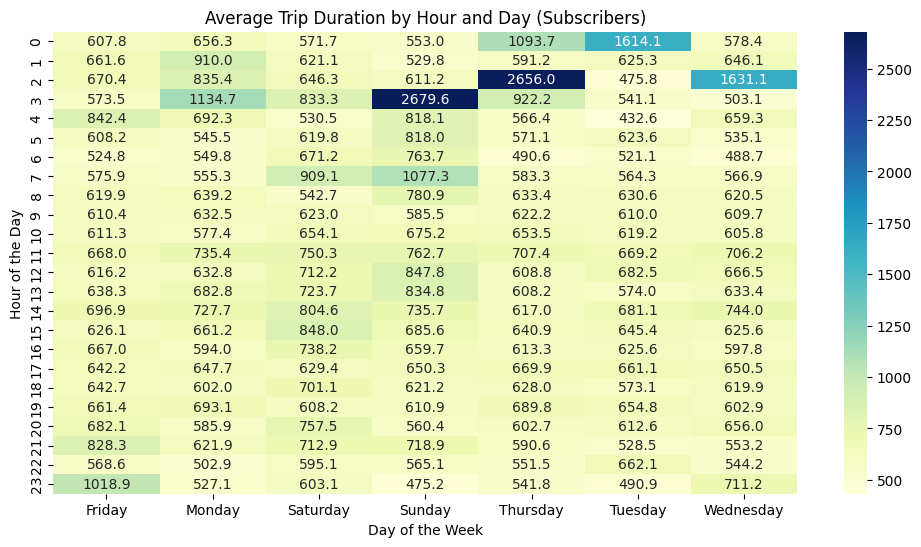

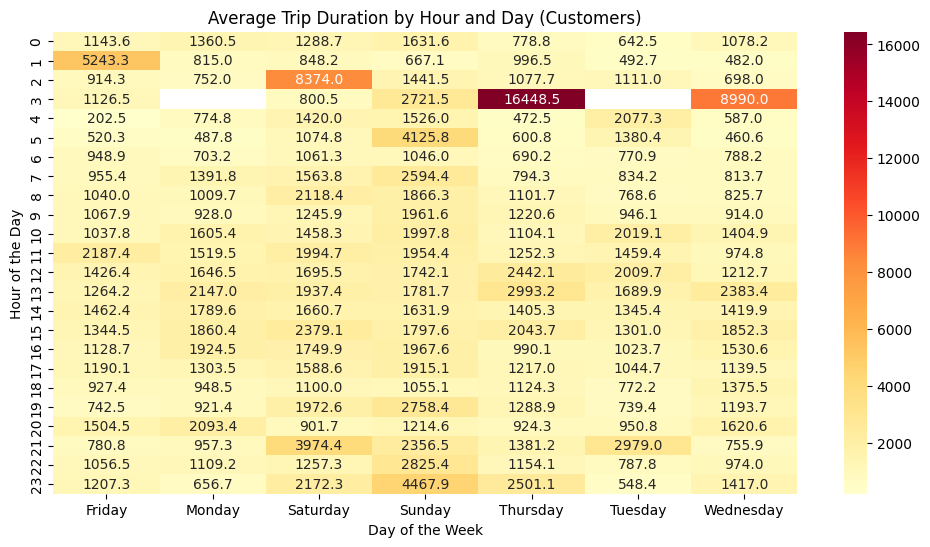

In [15]:
# Create a pivot table with average trip duration by hour and day of week, separated by user type
pivot_table_sub = data[data['user_type'] == 'Subscriber'].pivot_table(values='duration_sec', index='hour', columns='day_of_week', aggfunc='mean')
pivot_table_cust = data[data['user_type'] == 'Customer'].pivot_table(values='duration_sec', index='hour', columns='day_of_week', aggfunc='mean')

# Create the heatmap for Subscribers
plt.figure(figsize=(12, 6))
sb.heatmap(pivot_table_sub, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Average Trip Duration by Hour and Day (Subscribers)')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()

# Create the heatmap for Customers
plt.figure(figsize=(12, 6))
sb.heatmap(pivot_table_cust, cmap='YlOrRd', annot=True, fmt=".1f")
plt.title('Average Trip Duration by Hour and Day (Customers)')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()

Here are the observations for the two heatmaps:

Observation for Heatmap (Subscribers)
General Trend: Subscribers tend to have relatively consistent trip durations throughout the week, with notable peaks and valleys that align with typical commuting times.
Longest Durations: The longest trip durations for subscribers are observed on Thursday at 3 AM, with average trip durations exceeding 2600 seconds (approximately 44 minutes).
Morning and Evening Peaks: There are consistent peaks during the early morning hours (around 8-9 AM) and evening hours (around 5-6 PM), suggesting that subscribers primarily use the service for commuting purposes.
Weekend Patterns: During weekends, the trip durations tend to be longer, especially in the early hours, which could be attributed to leisure activities.
Observation for Heatmap (Customers)
General Trend: Customers display more variability in trip durations compared to subscribers, with some extreme values indicating significantly longer trips.
Longest Durations: The longest trip durations for customers occur on Thursday at 3 AM, with an exceptionally high average trip duration of over 16,000 seconds (approximately 4.5 hours). This suggests the presence of outliers or irregular usage patterns at this time.
Variability: Customers exhibit a wider range of trip durations across all hours and days, indicating that their usage is less predictable and likely more influenced by leisure activities.
Weekday Peaks: Similar to subscribers, customers also show higher trip durations during weekday mornings and evenings, aligning with potential commuting times.
Both heatmaps highlight the differences in usage patterns between subscribers and customers, with subscribers displaying more consistent and predictable patterns indicative of regular commuting, while customers show more variability and longer trip durations.

## Interesting Interactions

### Surprising Findings
-## Interesting Interactions

### Surprising Findings
- **Subscribers' Trip Durations**: Subscribers have consistently shorter trip durations across all hours. This suggests that subscribers primarily use the service for short, regular commutes.
- **Age and Trip Length**: Younger and older users tend to have similar trip lengths. This indicates that trip duration does not vary significantly with age.
- **Gender and Age Range**: Male users have a slightly broader age range. This suggests a more diverse age group among male users compared to female and other gender users.

## Conclusions
## Conclusions

### Summary of Main Findings
- **Trip Durations**: Most trips are short, with subscribers typically using the service for regular, short commutes. The distribution of trip durations shows that the majority of trips are less than 10 minutes long.
- **User Demographics**: The primary users of the bike-sharing service are younger adults in their 20s and 30s, with a majority being male. The age distribution indicates a higher frequency of users in their late 20s and early 30s.
- **Popular Times and Routes**: Trips are most frequent during the morning and evening rush hours, indicating that many users are likely commuting to and from work. Popular stations and routes are typically located in central and well-connected locations.
- **User Type and Trip Duration**: Subscribers generally have shorter trip durations compared to casual users. This pattern is consistent across different times of the day.

### Reflections
- **Insights from Data Exploration**: The data exploration provided valuable insights into the usage patterns of the bike-sharing service. Understanding these patterns can help optimize the service and target specific user groups more effectively.
- **Service Optimization**: The findings can be used to improve bike availability during peak hours, enhance user experience for the primary user demographic, and optimize popular routes and stations.
- **Targeted Marketing**: By understanding the primary user groups and their usage patterns, targeted marketing strategies can be developed to attract more users and retain existing ones.

### Future Work
- Further analysis could explore more granular data to identify specific factors influencing trip durations.
- Investigate seasonal variations and their impact on usage patterns.
- Analyze user feedback and satisfaction to identify areas for service improvement.

## Questions

- Any Questions?
- Thank you for your attention.
- Open the floor for questions and discussions.

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [3]:
jupyter nbconvert "C:\Users\Admin\OneDrive\Communicate Data Findings 2\Part_II_slide_deck_template.ipynb" --to slides --post serve --no-input --no-prompt


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (712877044.py, line 1)

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 